In [353]:
import pandas as pd
from random import randint

data = pd.read_excel('dataset/togel-hongkong.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TANGGAL       1160 non-null   datetime64[ns]
 1   HARI          1160 non-null   object        
 2   PERIODE       1160 non-null   int64         
 3   NOMOR KELUAR  1160 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 36.4+ KB


Text(0, 0.5, 'nomor')

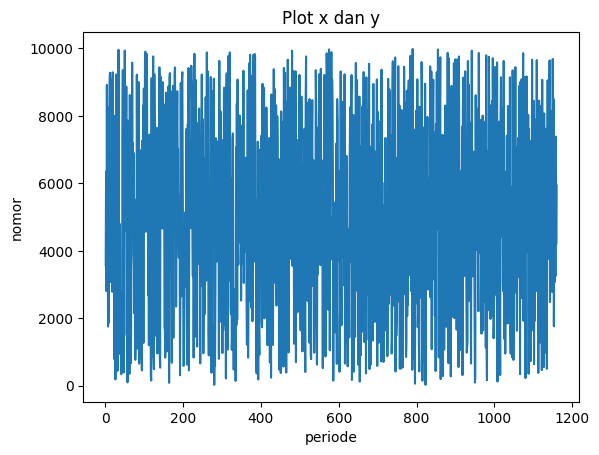

In [354]:
import matplotlib.pyplot as plt

x = data.sort_values('PERIODE')['PERIODE']
y = data.sort_values('PERIODE')['NOMOR KELUAR']

# Membuat plot
plt.plot(x, y)

# Memberi judul dan label sumbu
plt.title("Plot x dan y")
plt.xlabel("periode")
plt.ylabel("nomor")

# create_sliding windows

In [355]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data deret waktu
new_data = y.head(1060)
print(new_data)

# Ukuran jendela
w_size = [10,11,20,30,40,50,60]
n_pred = 5


1159    3570
1158    6353
1157    2805
1156    8920
1155    4359
        ... 
104     7076
103     3540
102     1630
101     4887
100     6704
Name: NOMOR KELUAR, Length: 1060, dtype: int64


In [356]:
def create_sliding_window(data, window_size, n_predictions):
    X, y = [], []
    for i in range(len(data) - window_size - n_predictions + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + n_predictions])
    return np.array(X), np.array(y)

# Membuat sliding window
# X, y = create_sliding_window(new_data, window_size= w_size, n_predictions = n_pred)

# print("X shape:", X.shape)
# print("y shape:", y.shape)

In [227]:
# Membagi data menjadi training dan testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# budi ways

In [228]:
# new_data = new_data.reshape(-1,1)
# new_data.shape

In [229]:
# SEQ_LEN = 21 # 6, 11, 21
# SPLIT = 0.90 # 0.80, 0.90
# WINDOW_SIZE = SEQ_LEN - 1

In [230]:
# def to_sequences(data, seq_len):
#     d = []
#     for index in range(len(data) - seq_len):
#         d.append(data[index: index + seq_len])
#     return np.array(d)

# def preprocess(data_raw, seq_len, train_split):
#     data = to_sequences(data_raw, seq_len)
#     num_train = int(train_split * data.shape[0])
#     X_train = data[:num_train, :-1, :]
#     y_train = data[:num_train, -1, :]
#     X_test = data[num_train:, :-1, :]
#     y_test = data[num_train:, -1, :]
#     return X_train, y_train, X_test, y_test

# X_train, y_train, X_test, y_test = preprocess(new_data, SEQ_LEN, train_split = SPLIT)

In [231]:
# print (X_train)
# print (y_train)
# print (X_test)
# print (y_test)

# tes beberapa model

In [357]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
import lightgbm as lgb



def matrices(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("Mean Absolute Error for prediction :", mae)
    print("Mean Squared Error for prediction :", mse)
    print("Root Mean Squared Error for prediction :", rmse)
    return mae, mse, rmse

def train (X_train, X_test, y_train, y_test,models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"Results for {model_name}:")
        matrices(y_test, y_pred)
        print()  # Baris kosong untuk pemisah

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "xgboost": XGBRegressor(),
    "XgboostRF": XGBRFRegressor()
}

In [358]:
for i in w_size:
    X, y = create_sliding_window(new_data, window_size= i, n_predictions = n_pred)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print('with w_size = ',i)
    train(X_train, X_test, y_train, y_test,models)


with w_size =  10
Results for Linear Regression:
Mean Absolute Error for prediction : 2527.1278922230044
Mean Squared Error for prediction : 8469550.160065575
Root Mean Squared Error for prediction : 2910.249157729553

Results for Random Forest:
Mean Absolute Error for prediction : 2540.058504761905
Mean Squared Error for prediction : 8639763.143391527
Root Mean Squared Error for prediction : 2939.3474009363927

Results for xgboost:
Mean Absolute Error for prediction : 2772.5498493303576
Mean Squared Error for prediction : 10917632.825361704
Root Mean Squared Error for prediction : 3304.1841391426274

Results for XgboostRF:
Mean Absolute Error for prediction : 2552.3489157831104
Mean Squared Error for prediction : 8721016.592605652
Root Mean Squared Error for prediction : 2953.136737878159

with w_size =  11
Results for Linear Regression:
Mean Absolute Error for prediction : 2530.7193209723146
Mean Squared Error for prediction : 8520912.820011672
Root Mean Squared Error for prediction 

# train with linear and rf with window 50 and 60 

In [362]:
import numpy as np

i = 50
# Get the last 100 numbers
tes = data.sort_values('PERIODE')['NOMOR KELUAR']
tes = tes.tail(100)
print(tes)
# tes = tes.head(99)
last_numbers = np.array(tes)

# Ensure last_numbers has the correct size for prediction
if last_numbers.shape[0] >= i:
    # Reshape to (1, i) to match the input shape for the model
    last_numbers = last_numbers[-i:].reshape(1, -1)  # Take the last i numbers
else:
    raise ValueError("Not enough numbers to make a prediction.")

print(last_numbers)

# Create sliding window data
X, y = create_sliding_window(new_data, window_size=i, n_predictions=n_pred)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(last_numbers)

print("Prediksi nomor lotre selanjutnya:", predicted_number.round())

99    3226
98    7361
97    5752
96    8892
95    8138
      ... 
4     5714
3     3247
2     7388
1     4194
0     5938
Name: NOMOR KELUAR, Length: 100, dtype: int64
[[2784 5838  378 6760 8456 3965 1280 6034 8296 7122 4533  461 9070 1393
  4118 5985  549 8074  963 5305 1490 7618 3843 6519  498 7267 9057 7116
  3768 5976 8461 9647 2480 6091 4525 8145 3401 4982 2774 9690 6421 8508
  1762 5213 3070 5714 3247 7388 4194 5938]]
Mean Absolute Error for prediction : 2584.231069387117
Mean Squared Error for prediction : 9182950.48904131
Root Mean Squared Error for prediction : 3030.3383456375477
Prediksi nomor lotre selanjutnya: [[5745. 3663. 3727. 4440. 5275.]]


In [363]:
import numpy as np

i = 50
# Get the last 100 numbers
tes = data.sort_values('PERIODE')['NOMOR KELUAR']
tes = tes.tail(100)
# tes = tes.head(99)
last_numbers = np.array(tes)

# Ensure last_numbers has the correct size for prediction
if last_numbers.shape[0] >= i:
    # Reshape to (1, i) to match the input shape for the model
    last_numbers = last_numbers[-i:].reshape(1, -1)  # Take the last i numbers
else:
    raise ValueError("Not enough numbers to make a prediction.")

print(last_numbers)

# Create sliding window data
X, y = create_sliding_window(new_data, window_size=i, n_predictions=n_pred)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict using the test set
y_pred = model.predict(X_test)
matrices(y_test, y_pred)

# Predict the next number using last_numbers
predicted_number = model.predict(last_numbers)

print("Prediksi nomor lotre selanjutnya:", predicted_number.round())

[[2784 5838  378 6760 8456 3965 1280 6034 8296 7122 4533  461 9070 1393
  4118 5985  549 8074  963 5305 1490 7618 3843 6519  498 7267 9057 7116
  3768 5976 8461 9647 2480 6091 4525 8145 3401 4982 2774 9690 6421 8508
  1762 5213 3070 5714 3247 7388 4194 5938]]
Mean Absolute Error for prediction : 2536.7781188118815
Mean Squared Error for prediction : 8682403.483664554
Root Mean Squared Error for prediction : 2946.591842054911
Prediksi nomor lotre selanjutnya: [[4864. 4275. 5130. 5103. 5019.]]


# pemecah angka

In [329]:
import pandas as pd

# Contoh dataframe dengan satu kolom angka
data = pd.read_excel('dataset/togel-hongkong.xlsx')
data = data.sort_values('PERIODE')

pick_dat = data['NOMOR KELUAR']

In [332]:
print(pick_dat)

1158    3570
1157    6353
1156    2805
1155    8920
1154    4359
        ... 
3       5714
2       3247
1       7388
0       4194
1159    5938
Name: NOMOR KELUAR, Length: 1160, dtype: int64


In [331]:
# iff u want to add new number 
pick_dat.loc[len(pick_dat)] = 5938

In [333]:
import itertools
import random
# Fungsi untuk menghasilkan kombinasi dua digit
def generate_combinations(num):
    num_str = str(num)
    combinations = []
    
    # Mengambil setiap kombinasi dua digit
    combinations = [''.join(pair) for pair in itertools.permutations(num_str, 2)]
    unique_list = list(set(combinations))

    return unique_list[:7]
    # return six_num

# Terapkan fungsi pada kolom 'angka'
pick_dat['kombinasi'] = pick_dat.apply(generate_combinations)

# Mengubah daftar kombinasi menjadi kolom-kolom
kombinasi_df = pick_dat['kombinasi'].apply(pd.Series)

# Menampilkan hasil
print(kombinasi_df)


       0   1   2   3   4   5   6
1158  03  05  53  37  35  75  50
1157  36  53  35  63  65  33  56
1156  85  05  58  20  02  52  50
1155  98  90  09  20  08  80  29
1154  94  93  53  35  49  39  59
...   ..  ..  ..  ..  ..  ..  ..
3     75  15  17  51  41  71  47
2     23  32  37  47  72  24  34
1     78  37  38  88  83  87  73
0     94  44  41  49  19  14  91
1159  93  98  85  53  58  35  39

[1160 rows x 7 columns]


In [334]:
kombinasi_df.to_excel('dataset/togel7.xlsx',index=False)

# tes menggunakan data togel 7

In [335]:
nomor = pd.read_excel("dataset/togel7.xlsx")

nomor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1160 non-null   int64  
 1   1       1159 non-null   float64
 2   2       1154 non-null   float64
 3   3       1108 non-null   float64
 4   4       1087 non-null   float64
 5   5       1087 non-null   float64
 6   6       1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 63.6 KB


# train predict biasa dengan RF

In [345]:
dat_train = nomor.head(1059)
dat_test = nomor.tail(100)

x = nomor.iloc[:,0:]
y = 

In [346]:
x

,0,1,2,3,4,5,6
0,3,5.0,53.0,37.0,35.0,75.0,50.0
1,36,53.0,35.0,63.0,65.0,33.0,56.0
2,85,5.0,58.0,20.0,2.0,52.0,50.0
3,98,90.0,9.0,20.0,8.0,80.0,29.0
4,94,93.0,53.0,35.0,49.0,39.0,59.0
...,...,...,...,...,...,...,...
1155,75,15.0,17.0,51.0,41.0,71.0,47.0
1156,23,32.0,37.0,47.0,72.0,24.0,34.0
1157,78,37.0,38.0,88.0,83.0,87.0,73.0
1158,94,44.0,41.0,49.0,19.0,14.0,91.0
